In [2]:
pip install pandas 

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\pmaya\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\pmaya\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 174.7 kB/s eta 0:00:00
     ------------------------------------ 965.4/965.4 KB 136.4 kB/s eta 0:00:00
     -------------------------------------- 55.3/55.3 KB 206.5 kB/s eta 0:00:00
     ------------------------------------ 163.6/163.6 KB 208.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\pmaya\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# Importing Dataset

In [11]:
df = pd.read_csv(f'D:\Software-developer-Salary-Prediction\clean_dataset.csv')

In [13]:
#df.head(10)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34025 entries, 0 to 34024
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        34025 non-null  object 
 1   Employment     34025 non-null  object 
 2   ConvertedComp  34025 non-null  float64
 3   EdLevel        34025 non-null  object 
 4   YearsCodePro   34025 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.3+ MB


In [15]:
df = df[['Country','Employment','ConvertedComp','EdLevel','YearsCodePro']]

In [16]:
df = df.dropna()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34025 entries, 0 to 34024
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        34025 non-null  object 
 1   Employment     34025 non-null  object 
 2   ConvertedComp  34025 non-null  float64
 3   EdLevel        34025 non-null  object 
 4   YearsCodePro   34025 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.3+ MB


In [18]:
# df.to_csv('stack_overflow_dataset.csv' , index=False )

In [19]:
df.ConvertedComp.value_counts()

120000.0     337
100000.0     304
150000.0     273
64859.0      255
2000000.0    254
            ... 
17737.0        1
57590.0        1
99400.0        1
42806.0        1
38759.0        1
Name: ConvertedComp, Length: 6873, dtype: int64

In [20]:
df = df.rename({'ConvertedComp':'Salary'} , axis=1)

In [21]:
df

,Country,Employment,Salary,EdLevel,YearsCodePro
0,United States,Employed full-time,116000.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13
1,United Kingdom,Employed full-time,32315.0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4
2,United Kingdom,Employed full-time,40070.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2
3,Spain,Employed full-time,14268.0,Some college/university study without earning ...,7
4,Netherlands,Employed full-time,38916.0,"Secondary school (e.g. American high school, G...",20
...,...,...,...,...,...
34020,Nigeria,Employed part-time,984.0,"Secondary school (e.g. American high school, G...",2
34021,Colombia,Employed full-time,19428.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5
34022,United States,Employed full-time,200.0,Some college/university study without earning ...,20
34023,Chile,Employed full-time,15048.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34025 entries, 0 to 34024
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34025 non-null  object 
 1   Employment    34025 non-null  object 
 2   Salary        34025 non-null  float64
 3   EdLevel       34025 non-null  object 
 4   YearsCodePro  34025 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.3+ MB


In [23]:
df = df[df['Employment'] == 'Employed full-time']

In [24]:
df = df.drop('Employment',axis=1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30019 entries, 0 to 34024
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       30019 non-null  object 
 1   Salary        30019 non-null  float64
 2   EdLevel       30019 non-null  object 
 3   YearsCodePro  30019 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


In [26]:
df.Country.value_counts()

United States     7569
India             2425
United Kingdom    2287
Germany           1903
Canada            1178
                  ... 
Benin                1
Fiji                 1
San Marino           1
Guinea               1
Andorra              1
Name: Country, Length: 154, dtype: int64

In [27]:
def shorten_categories(categories,cutoff):
    
    countries = {}
    for i in range(len(categories)):
        
        if categories.values[i] >= cutoff:
            countries[categories.index[i]] = categories.index[i]
        else:
            countries[categories.index[i]] = 'Other'
            
    return countries
        

In [28]:
country_map = shorten_categories(df.Country.value_counts() , 400)

df['Country'] =  df['Country'].map(country_map)
df

,Country,Salary,EdLevel,YearsCodePro
0,United States,116000.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13
1,United Kingdom,32315.0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4
2,United Kingdom,40070.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2
3,Spain,14268.0,Some college/university study without earning ...,7
4,Netherlands,38916.0,"Secondary school (e.g. American high school, G...",20
...,...,...,...,...
34018,Other,38208.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4
34021,Other,19428.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5
34022,United States,200.0,Some college/university study without earning ...,20
34023,Other,15048.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3


In [29]:
df.Country.value_counts()

Other                 8549
United States         7569
India                 2425
United Kingdom        2287
Germany               1903
Canada                1178
Brazil                 991
France                 972
Spain                  670
Australia              659
Netherlands            654
Poland                 566
Italy                  560
Russian Federation     522
Sweden                 514
Name: Country, dtype: int64

In [30]:
# help(plt.boxplot)

AttributeError: module 'matplotlib.pyplot' has no attribute 'Subtitle'

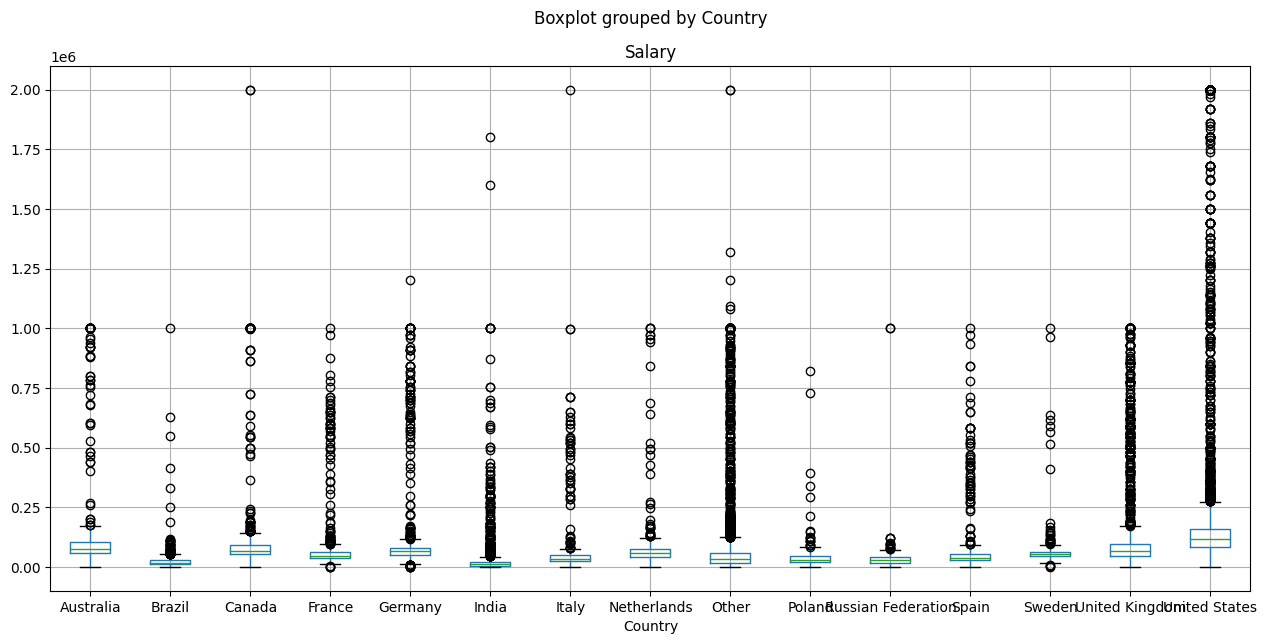

In [31]:
fig,ax= plt.subplots(1,1,figsize=(15,7))

df.boxplot('Salary','Country',ax=ax)
plt.Subtitle('Salary-Country')
ply.ylabel('Countries')
plt.xlabel('Salries')

In [32]:
df = df[df['Salary'] <= 250000]
df = df[df['Salary']>=10000]

df = df[df['Country'] != 'Other']

In [33]:
df

,Country,Salary,EdLevel,YearsCodePro
0,United States,116000.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13
1,United Kingdom,32315.0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4
2,United Kingdom,40070.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2
3,Spain,14268.0,Some college/university study without earning ...,7
4,Netherlands,38916.0,"Secondary school (e.g. American high school, G...",20
...,...,...,...,...
34009,United States,225000.0,Some college/university study without earning ...,15
34011,United States,150000.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6
34014,United States,70000.0,"Associate degree (A.A., A.S., etc.)",4
34016,United States,140000.0,"Other doctoral degree (Ph.D., Ed.D., etc.)",12


In [34]:
df['YearsCodePro'].unique()

array(['13', '4', '2', '7', '20', '1', '3', '10', '12', '29', '6', '28',
       '8', '23', '15', '25', '9', '11', 'Less than 1 year', '5', '21',
       '16', '18', '14', '32', '19', '22', '38', '30', '26', '27', '17',
       '24', '34', '35', '33', '36', '40', '39', 'More than 50 years',
       '31', '37', '41', '45', '42', '44', '43', '50', '49'], dtype=object)

In [35]:
def clean_years(cat):
        if cat == 'Less than 1 year':
            return 0.5
        elif cat == 'More than 50 years':
            return 50
        else:
            return float(cat)
            

In [36]:
df['YearsCodePro'] = df['YearsCodePro'].apply(clean_years)

In [37]:
df

,Country,Salary,EdLevel,YearsCodePro
0,United States,116000.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13.0
1,United Kingdom,32315.0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4.0
2,United Kingdom,40070.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2.0
3,Spain,14268.0,Some college/university study without earning ...,7.0
4,Netherlands,38916.0,"Secondary school (e.g. American high school, G...",20.0
...,...,...,...,...
34009,United States,225000.0,Some college/university study without earning ...,15.0
34011,United States,150000.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6.0
34014,United States,70000.0,"Associate degree (A.A., A.S., etc.)",4.0
34016,United States,140000.0,"Other doctoral degree (Ph.D., Ed.D., etc.)",12.0


In [38]:
df['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [39]:
def clean_edu(ed):
    
    if 'Bachelor’s degree' in ed:
        return 'Bachelor’s degree'
    elif 'Master’s degree' in ed:
        return 'Master’s degree'
    elif 'Professional degree' in ed or 'Other Doctoral' in ed:
        return 'Post grad'
    else:
        return 'Less than a Bachelors'

In [40]:
df['EdLevel'] = df['EdLevel'].apply(clean_edu)
df

,Country,Salary,EdLevel,YearsCodePro
0,United States,116000.0,Bachelor’s degree,13.0
1,United Kingdom,32315.0,Master’s degree,4.0
2,United Kingdom,40070.0,Bachelor’s degree,2.0
3,Spain,14268.0,Less than a Bachelors,7.0
4,Netherlands,38916.0,Less than a Bachelors,20.0
...,...,...,...,...
34009,United States,225000.0,Less than a Bachelors,15.0
34011,United States,150000.0,Bachelor’s degree,6.0
34014,United States,70000.0,Less than a Bachelors,4.0
34016,United States,140000.0,Less than a Bachelors,12.0


In [42]:
pip install -U scikit-learn

     ---------------------------------------- 7.5/7.5 MB 440.8 kB/s eta 0:00:00
     ------------------------------------ 298.0/298.0 KB 292.1 kB/s eta 0:00:00
     -------------------------------------- 40.1/40.1 MB 382.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\pmaya\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [43]:
from sklearn.preprocessing import LabelEncoder

le_edu = LabelEncoder()
df['EdLevel'] = le_edu.fit_transform(df['EdLevel'])

le_con = LabelEncoder()
df['Country'] = le_con.fit_transform(df['Country'])
df['Country'].unique()
df['EdLevel'].unique()
df

,Country,Salary,EdLevel,YearsCodePro
0,13,116000.0,0,13.0
1,12,32315.0,2,4.0
2,12,40070.0,0,2.0
3,10,14268.0,1,7.0
4,7,38916.0,1,20.0
...,...,...,...,...
34009,13,225000.0,1,15.0
34011,13,150000.0,0,6.0
34014,13,70000.0,1,4.0
34016,13,140000.0,1,12.0


# Let's Start

In [45]:
x = df.drop('Salary',axis=1)
y = df['Salary']

In [46]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(x,y.values)
y_pred = lr_model.predict(x)
y_pred

array([106688.4463635 ,  80737.95112602,  80119.36341297, ...,
        87129.15597374, 103024.02337077,  85451.59140563])

In [47]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

error = np.sqrt(mean_squared_error(y,y_pred))
error

39253.21049734323

In [61]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(x,y.values)
y_pred = dtr.predict(x)
y_pred

array([128630.58139535,  68708.33333333,  44644.07608696, ...,
        97856.02222222, 129927.84313725, 110431.23376623])

In [49]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

error = np.sqrt(mean_squared_error(y,y_pred))
error

39253.21049734323

In [50]:
from sklearn.neighbors import KNeighborsRegressor
# help(KNeighborsRegressor)
knn = KNeighborsRegressor(n_neighbors=17)

knn.fit(x,y.values)
y_pred = knn.predict(x)
y_pred

array([133922.29411765,  59500.64705882,  39158.11764706, ...,
        96466.17647059, 119048.23529412, 102750.70588235])

In [51]:
# def Elbow(n):
#     err = []
#     for i in range(1,n):
        
#         lr_model = KNeighborsRegressor(n_neighbors=i)

#         lr_model.fit(x,y.values)
#         y_pred = lr_model.predict(x)
#         err.append(np.sqrt(mean_squared_error(y,y_pred)))
        
#     return err

In [52]:
# n = 100
# err = Elbow(n)


# plt.plot(range(1,n-50) , err[1:50])

In [53]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

error = np.sqrt(mean_squared_error(y,y_pred))
error

31141.33094933678

In [54]:
from sklearn.ensemble import RandomForestRegressor
# help(KNeighborsRegressor)
reg = RandomForestRegressor(random_state=0)

reg.fit(x,y.values)

y_pred = reg.predict(x)
y_pred

array([128944.31037344,  68842.0034675 ,  44591.02838901, ...,
        98301.50980011, 130099.9784033 , 110340.40778375])

In [55]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

error = np.sqrt(mean_squared_error(y,y_pred))
error

29746.478752277475

In [56]:
X = np.array([["United States","Master’s degree",15]])
X

array([['United States', 'Master’s degree', '15']], dtype='<U15')

In [57]:
X[:,0] = le_con.transform(X[:,0])
X[:,1] = le_edu.transform(X[:,1])
X = X.astype(float)

In [59]:
X

array([[13.,  2., 15.]])

In [62]:
y_pred = dtr.predict(X)

C:\Users\pmaya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [63]:
y_pred

array([146432.08510638])

Importing picle

In [64]:
import pickle

In [65]:
data = {"model":dtr , "le_con":le_con ,"le_edu":le_edu }
with open('saved_steps.pkl','wb') as file:
    pickle.dump(data,file)

In [66]:
with open('saved_steps.pkl','rb') as file:
    data = pickle.load(file)
    
regressor_loaded = data['model']
le_edu = data['le_edu']
le_con = data['le_con']

In [67]:
y_pred = regressor_loaded.predict(X)
y_pred

C:\Users\pmaya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([146432.08510638])